In [1]:
## preamble : This part loads the packages that we will use

import math                          #needed for pi and cosine/sine
import numpy as np                   #for linspace
from scipy.integrate import odeint   #for odeint
import matplotlib.pyplot as plt      #for plotting

### Code for plotting the phase portrait and time series for the pendulum

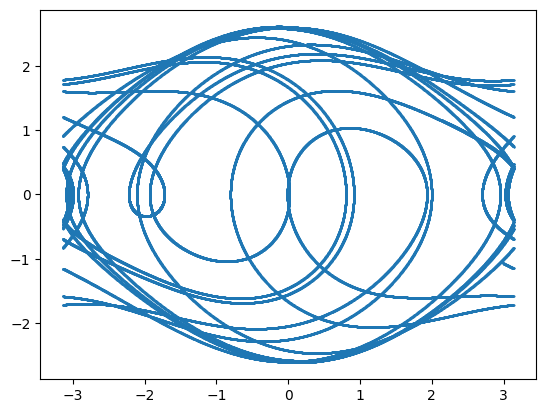

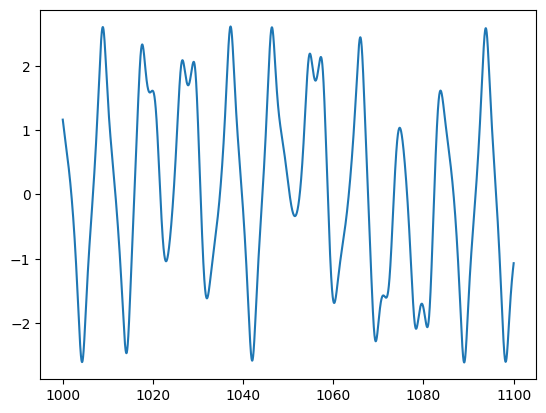

In [2]:
def dXdt(X,t,p,q,k,w):
 dxdt = X[1]
 dydt = -p*X[1]-q*math.sin(X[0])+k*math.cos(w*t)
 return [dxdt,dydt]
 
pi=math.pi  # define pi so we don't have to type math.pi each time

# define inital conditions
X0 = [pi/3,0]

# define parameters [you can change these]
p,q,k,w = 0.5, 1, 1.50, 0.667

# solve ODE
tmax,n = 1100,1000000
t = np.linspace(0,tmax,n)

X = odeint(dXdt,X0,t,args = (p,q,k,w))

# cut off first 1000 seconds
X = X[t>1000,:]
t = t[t>1000]

# angular displacement is measured from -pi to pi
X[:,0]=(X[:,0]+pi)%(2*pi)-pi

# plot results
plt.plot(X[:,0],X[:,1],'.',markersize=1)
plt.figure()
plt.plot(t,X[:,1])


### Code for plotting the Lorenz attractor

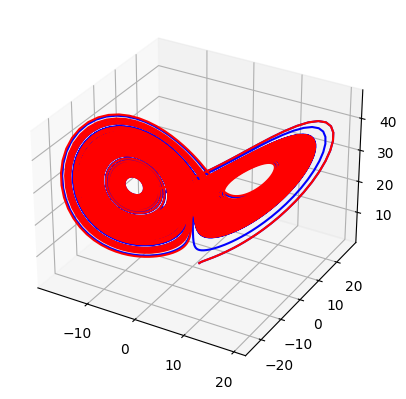

In [3]:
def dXdt(X,t,s,r,b):
 dxdt = s*(X[1]-X[0])
 dydt = X[0]*(r-X[2])-X[1]
 dzdt = X[0]*X[1]-b*X[2]
 return [dxdt,dydt,dzdt]

# define parameters [you can change these]
s,r,b = 10, 28, 8/3

#-----------------------------------------------------
 # define inital conditions
X0 = [1,1,1]

tmax,n = 100,10000
t = np.linspace(0,tmax,n)

# solve ODE first for one set of initial conditions
X0 = [1,1,1]
X_sol1 = odeint(dXdt,X0,t,args = (s,r,b))
#-----------------------------------------------------
 # change conditions by a tiny amount
X0 = X0+1e-10*np.array([1,0,0])
# solve ODE
X_sol2 = odeint(dXdt,X0,t,args = (s,r,b))

#-----------------------------------------------------
# to make 3D phase portrait
from mpl_toolkits import mplot3d
plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(X_sol1[:,0], X_sol1[:,1], X_sol1[:,2], 'blue')
ax.plot3D(X_sol2[:,0], X_sol2[:,1], X_sol2[:,2], 'red')
